# MODIS/MISR Machine Learning Cloud Mask

  Date                        Description
xx/xx/2018            


In [ ]:
from my_module import np, h5py, os, plt


WORKING_DIR = "/u/sciteam/smzyz/scratch/results/MOD_training/_500X500"

inum = 100
cloudy_file = "cloudy_batch_{}.h5".format(inum)
clear_file = "batch_{}.h5".format(inum)

with h5py.File(os.path.join(WORKING_DIR, clear_file), 'r') as h5f:
    data_all = h5f['X'][:]

In [ ]:

data = np.rollaxis(data_all[100, :, :, [0, 3, 2]]/300., 0, 3)
plt.imshow(data)
plt.show()


# 2018.05.10 -- 2018.05.20

Test MOD35 downloader

In [3]:
import sys
sys.path.append('/u/sciteam/smzyz/git_projects/ML_CM/preparation/')
from MOD35_downloader_V2 import main

for iday in range(1, 367):
    main(2013, iday)

  0%|          | 0/196 [00:00<?, ?it/s]

3383423 0
>> Download: /u/sciteam/smzyz/scratch/data/MODIS/MOD35/2013/019: 196 files


  0%|          | 0/182 [00:00<?, ?it/s]

13049259 8388608
>> Download: /u/sciteam/smzyz/scratch/data/MODIS/MOD35/2013/020: 182 files


  0%|          | 0/208 [00:00<?, ?it/s]

12685998 0
>> Download: /u/sciteam/smzyz/scratch/data/MODIS/MOD35/2013/021: 208 files


  0%|          | 0/213 [00:00<?, ?it/s]

3300301 0
>> Download: /u/sciteam/smzyz/scratch/data/MODIS/MOD35/2013/022: 213 files


  0%|          | 0/220 [00:00<?, ?it/s]

3095000 0
>> Download: /u/sciteam/smzyz/scratch/data/MODIS/MOD35/2013/023: 220 files


  0%|          | 0/214 [00:00<?, ?it/s]

3098336 0
>> Download: /u/sciteam/smzyz/scratch/data/MODIS/MOD35/2013/024: 214 files


  0%|          | 0/288 [00:00<?, ?it/s]

>> Download: /u/sciteam/smzyz/scratch/data/MODIS/MOD35/2013/025: 288 files


  0%|          | 0/288 [00:00<?, ?it/s]

>> Download: /u/sciteam/smzyz/scratch/data/MODIS/MOD35/2013/026: 288 files


  0%|          | 0/288 [00:00<?, ?it/s]

>> Download: /u/sciteam/smzyz/scratch/data/MODIS/MOD35/2013/027: 288 files


  0%|          | 0/288 [00:00<?, ?it/s]

>> Download: /u/sciteam/smzyz/scratch/data/MODIS/MOD35/2013/028: 288 files


  0%|          | 0/288 [00:00<?, ?it/s]

>> Download: /u/sciteam/smzyz/scratch/data/MODIS/MOD35/2013/029: 288 files


  0%|          | 0/288 [00:00<?, ?it/s]

>> Download: /u/sciteam/smzyz/scratch/data/MODIS/MOD35/2013/030: 288 files


  0%|          | 0/288 [00:00<?, ?it/s]

>> Download: /u/sciteam/smzyz/scratch/data/MODIS/MOD35/2013/031: 288 files


  0%|          | 0/288 [00:00<?, ?it/s]

>> Download: /u/sciteam/smzyz/scratch/data/MODIS/MOD35/2013/032: 288 files


  0%|          | 0/288 [00:00<?, ?it/s]

>> Download: /u/sciteam/smzyz/scratch/data/MODIS/MOD35/2013/033: 288 files


  0%|          | 0/288 [00:00<?, ?it/s]

>> Download: /u/sciteam/smzyz/scratch/data/MODIS/MOD35/2013/034: 288 files


  0%|          | 0/288 [00:00<?, ?it/s]

>> Download: /u/sciteam/smzyz/scratch/data/MODIS/MOD35/2013/035: 288 files


  0%|          | 0/288 [00:00<?, ?it/s]

>> Download: /u/sciteam/smzyz/scratch/data/MODIS/MOD35/2013/036: 288 files


  0%|          | 0/288 [00:00<?, ?it/s]

>> Download: /u/sciteam/smzyz/scratch/data/MODIS/MOD35/2013/037: 288 files


  0%|          | 0/288 [00:00<?, ?it/s]

>> Download: /u/sciteam/smzyz/scratch/data/MODIS/MOD35/2013/038: 288 files


100%|█████████▉| 287/288 [26:54<00:05,  5.62s/it]

>> HTTPError: https://ladsweb.modaps.eosdis.nasa.gov/archive/allData/61/MOD35_L2/2013/038/MOD35_L2.A2013038.2350.061.2017296153738.hdf


  0%|          | 0/288 [00:00<?, ?it/s]

>> Download: /u/sciteam/smzyz/scratch/data/MODIS/MOD35/2013/319: 288 files


 59%|█████▉    | 170/288 [15:54<11:02,  5.61s/it]

>> HTTPError: https://ladsweb.modaps.eosdis.nasa.gov/archive/allData/61/MOD35_L2/2013/319/MOD35_L2.A2013319.1405.061.2017305020440.hdf


 98%|█████████▊| 281/288 [25:36<00:38,  5.47s/it]

>> HTTPError: https://ladsweb.modaps.eosdis.nasa.gov/archive/allData/61/MOD35_L2/2013/319/MOD35_L2.A2013319.2320.061.2017305020656.hdf


100%|██████████| 288/288 [26:39<00:00,  5.55s/it]


>> HTTPError: https://ladsweb.modaps.eosdis.nasa.gov/archive/allData/61/MOD35_L2/2013/366.csv


# 2018.05.14

Arctic Cloud Climatology Comparison

In [1]:
from my_module import np, h5py, plt, Basemapemap



In [11]:
mod35_daily = "/u/sciteam/smzyz/A2015001.h5"
with h5py.File(mod35_daily, 'r') as h5:
    cf = 1.0 * h5['cloud_sum'][:] / h5['total_sum'][:] 

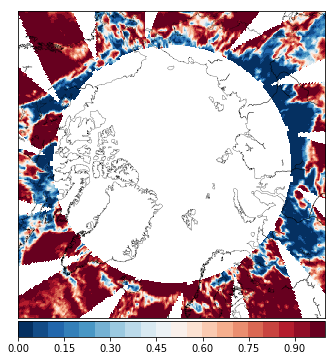

In [35]:

plt.figure(figsize=(8, 6))

lats = np.arange(-90, 90, 0.5) + 0.25
lons = np.arange(-180, 180, 0.5) + 0.25

# m = Basemap(projection='ortho', lat_0=60, lon_0=0, resolution='l')
m = Basemap(projection='npaeqd',boundinglat=60,lon_0=0,resolution='l')
m.drawcoastlines(linewidth=0.25)

cf_new = m.transform_scalar(cf[::-1, :], lons, lats, 720, 360)

import matplotlib.colors as colors
bounds = np.linspace(0, 1, 21)
norm = colors.BoundaryNorm(boundaries=bounds, ncolors=256)
m.imshow(cf_new, norm=norm, cmap='RdBu_r')
m.colorbar(location='bottom', pad=0.05)
plt.show()

In [33]:
m.colorbar?

# 2018.05.21

Use organized daily MODIS data to do something.

In [10]:


from my_module import np, h5py, plt



mod03 = h5py.File('/Volumes/postdoc/Data_samples/MODIS/daily_MOD03.A2015001.006.h5', 'r')
mod35 = h5py.File('/Volumes/postdoc/Data_samples/MODIS/daily_MOD35_L2.A2015001.061.h5', 'r')
mod02_vis = h5py.File('/Volumes/postdoc/Data_samples/MODIS/daily_MOD021KM_VIS.A2015001.006.h5', 'r')
mod02_swir = h5py.File('/Volumes/postdoc/Data_samples/MODIS/daily_MOD021KM_SWIR.A2015001.006.h5', 'r')
mod02_lw = h5py.File('/Volumes/postdoc/Data_samples/MODIS/daily_MOD021KM_LW.A2015001.006.h5', 'r')

In [9]:
print mod03['0000'].items()
print mod35['0000'].items()
print mod02_vis['0000'].items()
print mod02_swir['0000'].items()
print mod02_lw['0000'].items()

[(u'Latitude', <HDF5 dataset "Latitude": shape (2030, 1354), type "<f4">), (u'Longitude', <HDF5 dataset "Longitude": shape (2030, 1354), type "<f4">), (u'SensorZenith', <HDF5 dataset "SensorZenith": shape (2030, 1354), type "<i2">), (u'SolarZenith', <HDF5 dataset "SolarZenith": shape (2030, 1354), type "<i2">)]
[(u'Cloud_Mask', <HDF5 dataset "Cloud_Mask": shape (2030, 1354, 6), type "|i1">), (u'Quality_Assurance', <HDF5 dataset "Quality_Assurance": shape (2030, 1354, 10), type "|i1">), (u'Test_Flags', <HDF5 dataset "Test_Flags": shape (2030, 1354, 5), type "|i1">)]
[(u'Radiance_Offsets', <HDF5 dataset "Radiance_Offsets": shape (7,), type "<f8">), (u'Radiance_Scales', <HDF5 dataset "Radiance_Scales": shape (7,), type "<f8">), (u'Reflectance_Offsets', <HDF5 dataset "Reflectance_Offsets": shape (7,), type "<f8">), (u'Reflectance_Scales', <HDF5 dataset "Reflectance_Scales": shape (7,), type "<f8">), (u'Scaled_Integers', <HDF5 dataset "Scaled_Integers": shape (7, 2030, 1354), type "<u2">)]


-88.56814 -62.77379


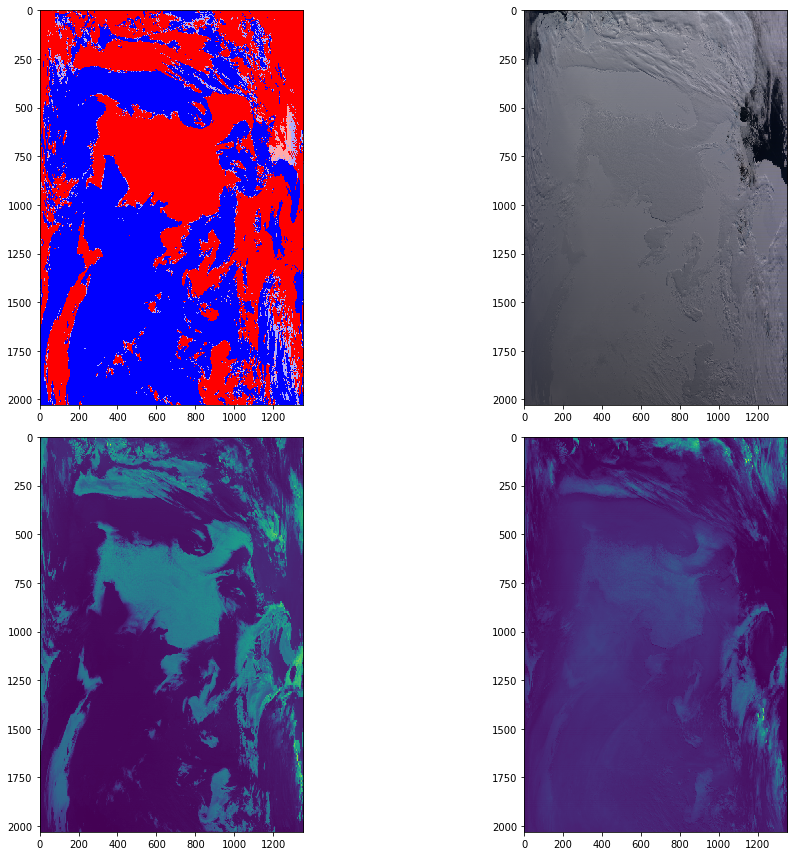

In [142]:


def get_data(icat, itime, iband, itype='radiance'):
    if itype == 'radiance':
        scale = icat['/{}/Radiance_Scales'.format(itime)][iband]
        offset = icat['/{}/Radiance_Offsets'.format(itime)][iband]
    else:
        scale = icat['/{}/Reflectance_Scales'.format(itime)][iband]
        offset = icat['/{}/Reflectance_Offsets'.format(itime)][iband]
    
    scaled_value = icat['/{}/Scaled_Integers'.format(itime)][iband]
    
    max_value = (32767 - offset) * scale
    radiance = (scaled_value - offset) * scale
    radiance = np.ma.masked_greater(radiance, max_value)
    return radiance



itime = '2245'
lat = mod03['/{}/Latitude'.format(itime)][:]
print lat.min(), lat.max()
data_0 = get_data(mod02_vis, itime, 0, 'reflectance')
data_1 = get_data(mod02_vis, itime, 3, 'reflectance')
data_2 = get_data(mod02_vis, itime, 2, 'reflectance')
data_3 = get_data(mod02_lw, itime, 0)
data_4 = get_data(mod02_swir, itime, -1)
data = np.dstack([data_0, data_1, data_2])


plt.figure(figsize=(16, 12))
plt.subplot(221)
plt.imshow( mod35['/{}/Cloud_Mask'.format(itime)][:, :, 1], cmap='bwr_r' )

plt.subplot(222)
plt.imshow( data )

plt.subplot(223)
plt.imshow( data_3 )


plt.subplot(224)
plt.imshow( data_4 )

plt.tight_layout()
plt.show()

In [80]:
mod03['/{}/Longitude'.format(itime)][:].max()

masked_array(
  data=[[0.20897705, 0.17462321, 0.14465609, ..., 0.35754419, 0.35654001,
         0.36224803],
        [0.17996127, 0.18519362, 0.14687588, ..., 0.35220614, 0.35453163,
         0.36430926],
        [0.18054264, 0.1948127 , 0.14682303, ..., 0.34396122, 0.34787227,
         0.35759705],
        ...,
        [0.00443957, 0.00470383, 0.00465098, ..., 0.09872765, 0.10100029,
         0.09497515],
        [0.00433387, 0.00459813, 0.00465098, ..., 0.10036606, 0.10279726,
         0.10956232],
        [0.00438672, 0.00465098, 0.00454528, ..., 0.1050699 , 0.11949851,
         0.12293389]],
  mask=False,
  fill_value=1e+20)